<a href="https://colab.research.google.com/github/mghendi/smartphonepriceclassifier/blob/main/CCI_501_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CCI501 - Machine Learning Project

### Name: Samuel Mwamburi Mghendi 

### Admission Number: P52/37621/2020

### Email: mghendi@students.uonbi.ac.ke

### Course: Machine Learning – CCI 501

### Applying Logistic Regression to Establish a Good Pricing Model for Mobile Phone Manufacturers in the Current Market Landscape using Technical Specifications and User Preference.

#### This report is organised as follows.

1. Problem Statement
2. Data Description
   * Data Loading and Preparation
   * Exploratory Data Analysis
3. Data Preprocessing
4. Data Modelling
5. Performance Evaluation
6. Conclusion

### 1. Problem Statement

#### To determine the price of a mobile phone in the current market using specifications i.e. screen size, screen and camera resolution, internal storage and battery capacity and user preference.

Traditionally, and rightfully so, consumers have been forced to part with a premium to own a mobile phone with top-of-the-line features and specifications. Some smartphone manufacturers in 2020 still charge upwards of KES 100,000 for a mobile phone that has a large screen, good battery, fast processor and sufficient storage capacity. However, according to a December article on Android Central, mobile phones with great features are getting significantly affordable. (Johnson, 2020)

A phone’s specifications is a logical way of determining which class it falls under, with the emergence of cheaper manufacturing techniques and parts however, phone pricing models have become more blurry and it is possible for consumers to purchase more powerful smartphones at cheaper prices.

This study intends to explore this hypothesis and predict the relationship between these features and the price of a mobile phone in the current landscape using phone specification, product rating and prices data scraped from a Kenyan e-commerce site.

#### Why Logistic Regression?

A supervised learning approach would be useful for this experiment since the data being explored has price labels and categories. Logistic regression is used to classify data by considering outcome variables on extreme ends and consequently forms a line to distinguish them.


### 2. Data Description
   ####  Data Loading and Preparation
   
   
   
#### Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
from tqdm import trange

#### Import Data

In [ ]:
df = pd.read_csv("productdata.csv")

In [ ]:
df

,Phone,Screen (inches),Resolution (pixels),Camera (MP),OS,Storage (GB),RAM (GB),Battery (mAh),Battery Type,Price(Kshs),Price Category,Rating,Likes
0,Gionee M7 Power,6.00,720x1440,8.0,OS:Android 7.1 Nougat,64,4,4000,Li-Po,15880,Mid-Tier,4.0,13
1,Gionee M7,6.01,1080x2160,8.0,OS:Android 7.1 Nougat,64,6,4000,Li-Po,15880,Mid-Tier,4.5,8
2,Samsung Galaxy M21 6GB/128GB,6.40,1080x2340,20.0,OS:Android 10; One UI 2.0,128,6,6000,Li-Po,21590,Mid-Tier,4.3,30
3,Samsung Galaxy M21 4GB/64GB,6.40,1080x2340,20.0,OS:Android 10; One UI 2.0,64,4,6000,Li-Po,22499,Mid-Tier,3.8,31
4,Samsung Galaxy A31 6GB/128GB,6.40,1080x2400,20.0,OS:Android 10; One UI 2.0,128,6,5000,Li-Po,24999,Mid-Tier,3.8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Nokia 105 (2019),1.77,120x160,8.0,NaN,4,8,800,Li-Ion,1900,Budget,3.0,11
1144,Nokia 220 4G,2.40,240x320,8.0,NaN,24,8,1200,Li-Ion,1900,Budget,4.0,8
1145,Nokia X71,6.39,1080x2316,16.0,OS:Android 9.0 Pie; Android One,128,6,3500,Li-Po,1900,Budget,3.0,53
1146,Nokia 2.2 3GB/32GB,5.71,720x1520,5.0,OS:Android 9.0 Pie; Android One,32,3,3000,Li-Ion,1900,Budget,3.4,50


In [ ]:
from sklearn import preprocessing

####  Exploratory Data Analysis

Gathering more information about the dataset in order to better understand it.
The relationship and distribution between screen size, screen resolution, camera resolution, storage space, memory, rating and likes against the resultant price charged for each phone sold was plotted and analyzed.

In [ ]:
df.describe()

,Screen (inches),Camera (MP),Storage (GB),RAM (GB),Battery (mAh),Price(Kshs),Rating,Likes
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.00000,1148.000000,1148.000000
mean,5.960514,13.542247,89.383275,5.020906,3715.581010,21606.54007,3.934408,25.145470
std,0.751110,9.074660,89.970931,15.218189,884.147333,31945.03042,0.757267,32.155663
min,1.770000,0.300000,4.000000,1.000000,800.000000,189.00000,1.300000,1.000000
25%,5.500000,8.000000,32.000000,3.000000,3000.000000,1310.00000,3.400000,7.000000
50%,6.200000,10.000000,64.000000,4.000000,4000.000000,13975.00000,4.000000,14.000000
75%,6.500000,16.000000,128.000000,6.000000,4200.000000,25999.00000,4.500000,29.250000
max,8.100000,48.000000,1024.000000,512.000000,7000.000000,446342.00000,5.000000,296.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phone                1148 non-null   object 
 1   Screen (inches)      1148 non-null   float64
 2   Resolution (pixels)  1148 non-null   object 
 3   Camera (MP)          1148 non-null   float64
 4   OS                   1131 non-null   object 
 5   Storage (GB)         1148 non-null   int64  
 6   RAM (GB)             1148 non-null   int64  
 7   Battery (mAh)        1148 non-null   int64  
 8   Battery Type         1148 non-null   object 
 9   Price(Kshs)          1148 non-null   int64  
 10  Price Category       1148 non-null   object 
 11  Rating               1148 non-null   float64
 12  Likes                1148 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 116.7+ KB


The feature OS has missing values.

In [ ]:
# check shape
df.shape

(1148, 13)

The dataset has 1,148 records and 12 features.

In [ ]:
# remove duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(1148, 13)

No duplicate records available in the dataset.

#### Mobile Phones by Screen Size Contrasted by User Rating

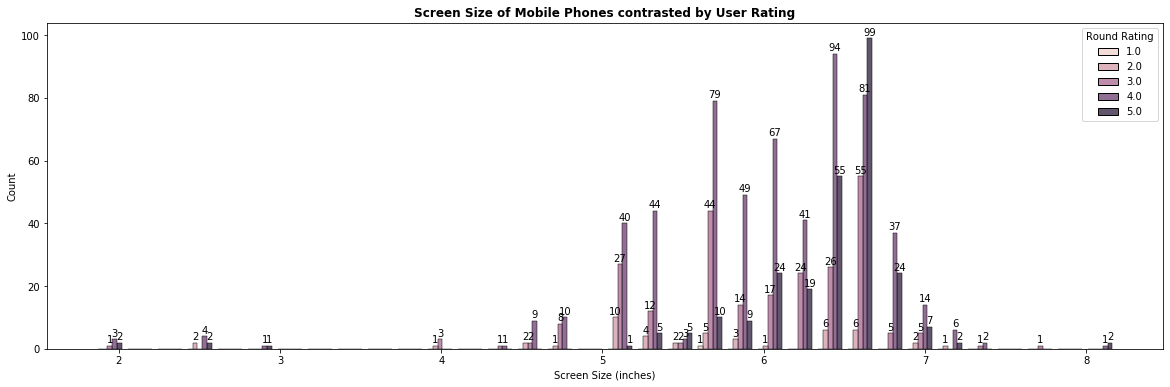

Screen Size: values count=1148, min=1.77, max=8.1, mean=5.960513937282228


In [ ]:
# previewing distribution of screen size by rating
df['Round Rating'] = df['Rating'].round(decimals=0)
plt.figure(figsize = (20, 6))

ax = sns.histplot(df, x="Screen (inches)", stat="count", hue="Round Rating", multiple="dodge", shrink=0.8)
for p in ax.patches:# histogram bar label
  h = p.get_height()
  if (h != 0): ax.text(x = p.get_x()+(p.get_width()/2), y = h+1, s = "{:.0f}".format(h),ha = "center")
plt.xlabel('Screen Size (inches)')
plt.title("Screen Size of Mobile Phones contrasted by User Rating", fontsize=12, fontweight="bold");
plt.show()
print("Screen Size: values count=" + str(df['Screen (inches)'].count()) + ", min=" + str(df['Screen (inches)'].min()) + ", max=" + str(df['Screen (inches)'].max()) + ", mean=" + str(df['Screen (inches)'].mean()))

The chart can be used to deduce a high-level inference on the phone industry consumer purchase preference. Phones with a larger screen size, which are inherently larger in size, between 5 to 7 inches are seen to be rated higher. 

In [ ]:
# changing the datatype of the 'OS' variable
df['OS'] = df['OS'].astype('str')

#### Mobile Phones by Camera Resolution contrasted by User Rating

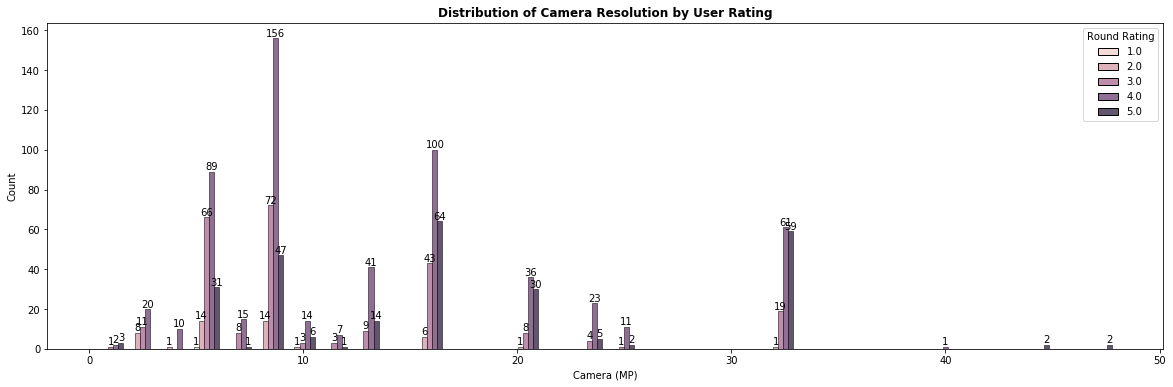

Camera (MP): values count=1148, min=0.3, max=48.0, mean=13.54224738675958


In [ ]:
# previewing distribution of camera resolution by rating
plt.figure(figsize = (20, 6))
ax = sns.histplot(df, x="Camera (MP)", hue="Round Rating", multiple="dodge", shrink=0.8)
for p in ax.patches:# label each bar in histogram
  h = p.get_height()
  if (h != 0): ax.text(x = p.get_x()+(p.get_width()/2), y = h+1, s = "{:.0f}".format(h),ha = "center")
plt.xlabel('Camera (MP)')
plt.title("Distribution of Camera Resolution by User Rating", fontsize=12, fontweight="bold");
plt.show()
print("Camera (MP): values count=" + str(df['Camera (MP)'].count()) + ", min=" + str(df['Camera (MP)'].min()) + ", max=" + str(df['Camera (MP)'].max()) + ", mean=" + str(df['Camera (MP)'].mean()))

Mobile phones with cameras sporting high resolutions,15 and 32 Megapixels , based on the current offering in the market have significantly better relative ratings than mid-tier models between 20 to 30 Megapixels and low-tier models less than 5 megapixels.

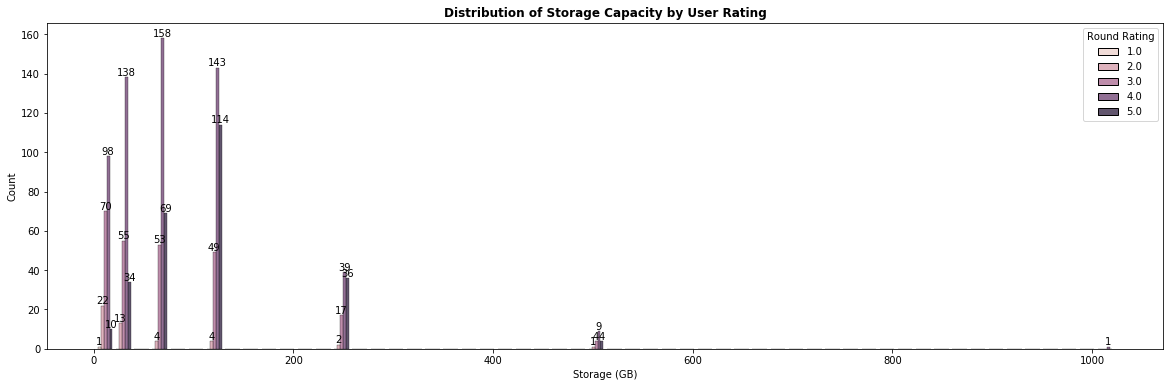

Storage (GB): values count=1148, min=4, max=1024, mean=89.38327526132404


In [ ]:
# previewing distribution of Storage Capacity by rating
plt.figure(figsize = (20, 6))
ax = sns.histplot(df, x="Storage (GB)", hue="Round Rating", multiple="dodge", shrink=0.8)
for p in ax.patches:# label each bar in histogram
  h = p.get_height()
  if (h != 0): ax.text(x = p.get_x()+(p.get_width()/2), y = h+1, s = "{:.0f}".format(h),ha = "center")
plt.xlabel('Storage (GB)')
plt.title("Distribution of Storage Capacity by User Rating", fontsize=12, fontweight="bold");
plt.show()
print("Storage (GB): values count=" + str(df['Storage (GB)'].count()) + ", min=" + str(df['Storage (GB)'].min()) + ", max=" + str(df['Storage (GB)'].max()) + ", mean=" + str(df['Storage (GB)'].mean()))

As anticipated, mobile phones with higher internal storage capacities, greater than or equal to 256 Gigabytes, recieve significantly better relative ratings than models with less than 128 gigabytes. Additionally, there are very few purchases of mobile phones equal to or greater than 512 gigabytes of storage.

#### Mobile Phones Specifications by User Preference(Likes)

In the E-Commerce store from which the data was retrieved, users are also capable of adding a product to their wishlist after a high level assessment of the product features and pricing. The number of likes a product has recieved refers to the number of users who have added the given product to their wishlist.

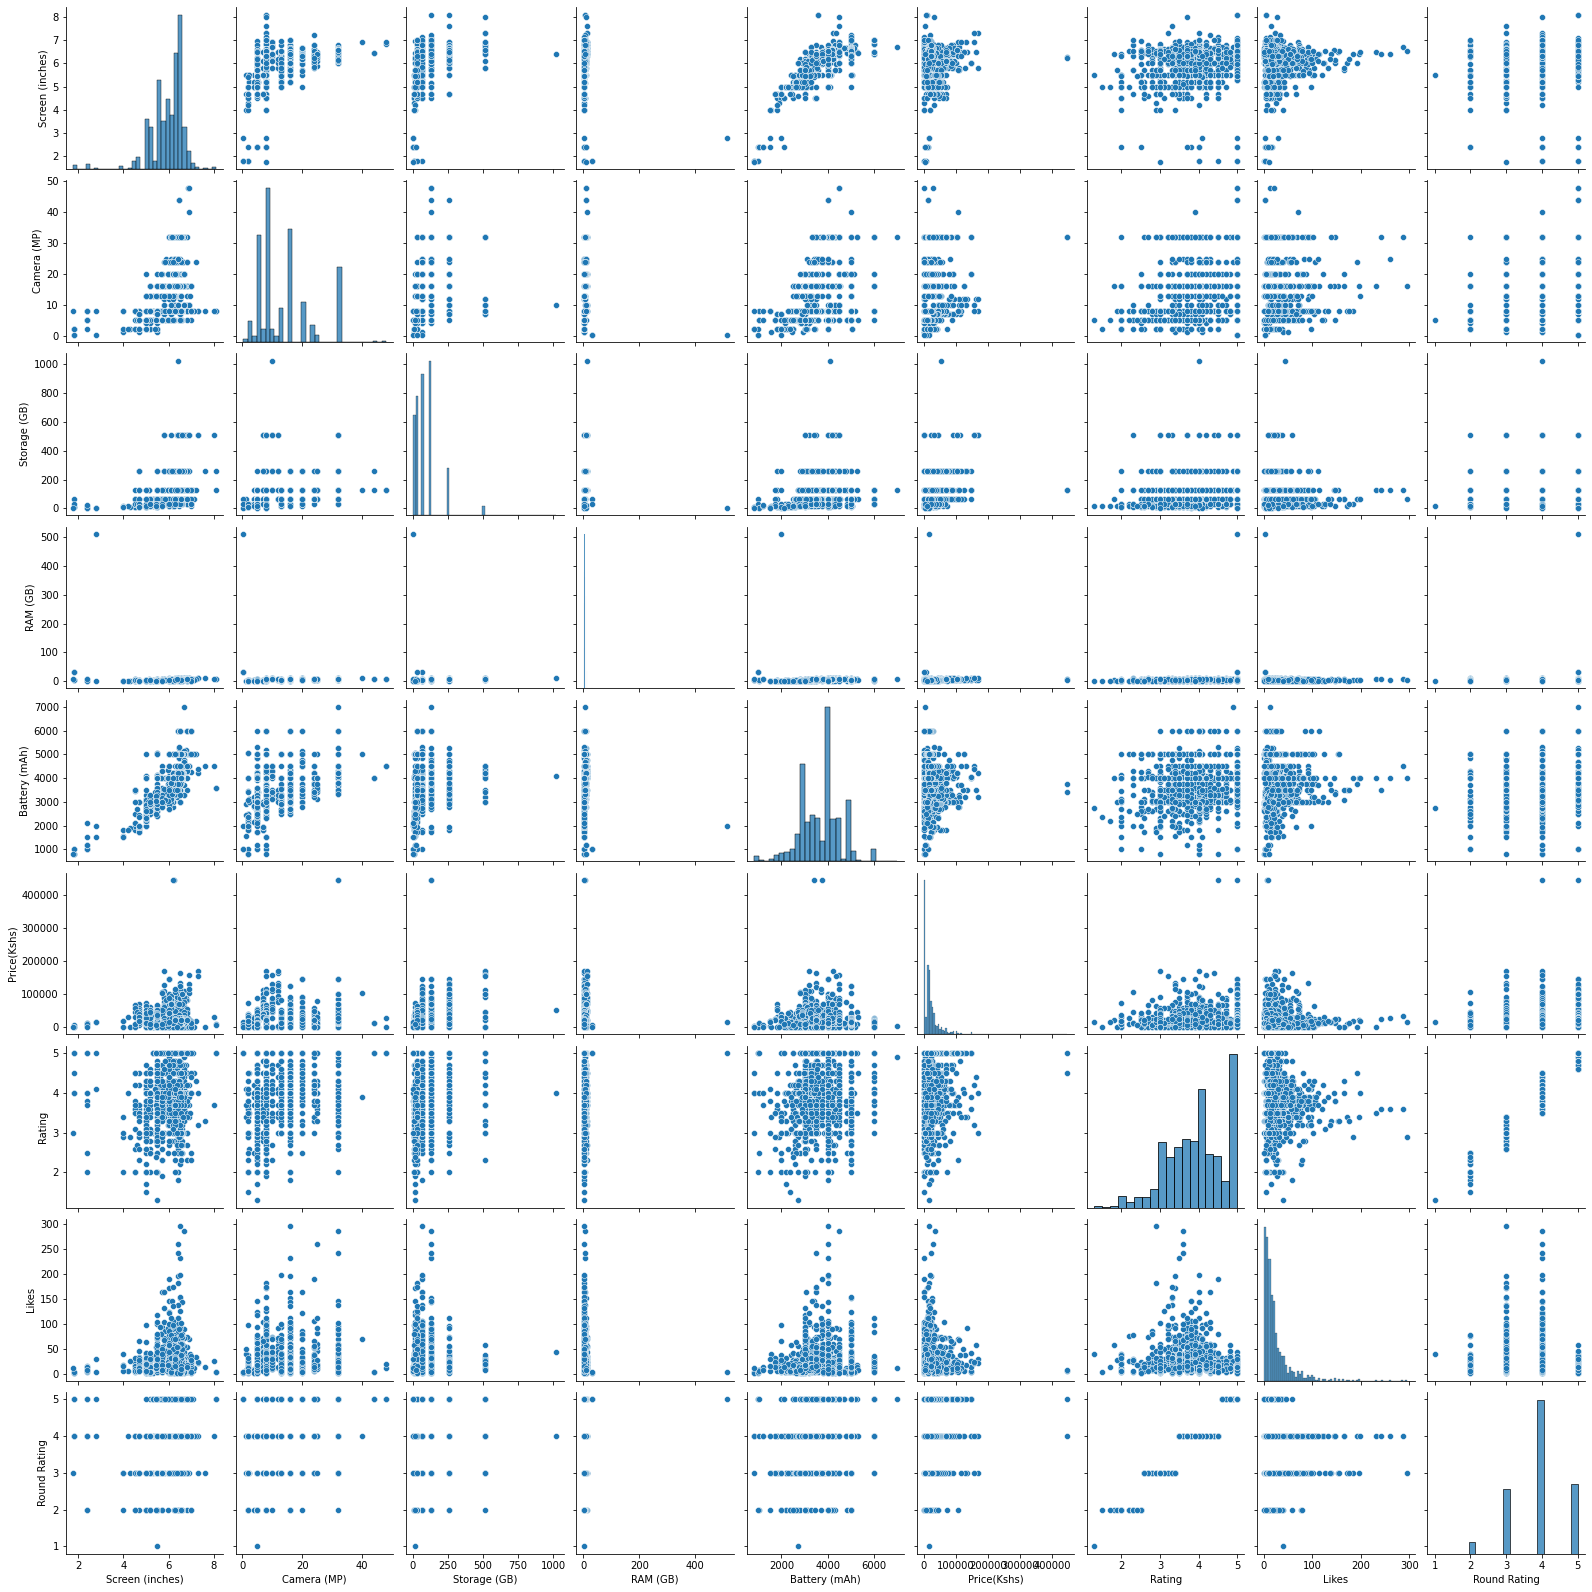

In [ ]:
#pairplot to investigate the relationship between all the variables 
sns.pairplot(df)
plt.show()

In reference to the pair plot above, mid-tier phone models are significantly better rated and well recieved as compared to their much more expensive and budget counterparts in the local current market.

Phones with mid-tier features such as an average storage capacity, such as a large display 5 to 7 inches, storage of between 128 Gigabytes of storage, 4 Gigabytes of RAM, 3000 to 5000 milliampere hours battery capacity and 10 to 30 Megapixel Camera Resolution are well recieve more likes. 

There appears to be a direct correlation between the number of likes a product recieves before-hand and the user ratings after purchase. Mobile phones that recieved an average rating of 4 had roughly 300 likes from users based on the specifications and price point provided.

This also implies that the likes a product recieved directly translates to an purchase of the product in the long term. 

### 3. Data Preprocessing



#### Converting Text to Numerical Vector

The features Price Category and Battery Type contain important dependent and independent values respectively key in the experiment. These values would need to be converted into numerical values in order to be applied in the algorithm.

In [ ]:
# creating categorigal variables for the battery type feature
df["Battery Type"].replace({"Li-Po": "0", "Li-Ion": "1"}, inplace=True)
print(df)

                             Phone  Screen (inches) Resolution (pixels)  \
0                  Gionee M7 Power             6.00            720x1440   
1                        Gionee M7             6.01           1080x2160   
2     Samsung Galaxy M21 6GB/128GB             6.40           1080x2340   
3      Samsung Galaxy M21 4GB/64GB             6.40           1080x2340   
4     Samsung Galaxy A31 6GB/128GB             6.40           1080x2400   
...                            ...              ...                 ...   
1143              Nokia 105 (2019)             1.77             120x160   
1144                  Nokia 220 4G             2.40             240x320   
1145                     Nokia X71             6.39           1080x2316   
1146            Nokia 2.2 3GB/32GB             5.71            720x1520   
1147            Nokia 2.2 2GB/16GB             5.71            720x1520   

      Camera (MP)                               OS  Storage (GB)  RAM (GB)  \
0             8.0    

In [ ]:
# creating categorigal variables for the battery type feature
df["Price Category"].replace({"Budget": "0", "Mid-Tier": "1", "Flagship": "2"}, inplace=True)
print(df)

                             Phone  Screen (inches) Resolution (pixels)  \
0                  Gionee M7 Power             6.00            720x1440   
1                        Gionee M7             6.01           1080x2160   
2     Samsung Galaxy M21 6GB/128GB             6.40           1080x2340   
3      Samsung Galaxy M21 4GB/64GB             6.40           1080x2340   
4     Samsung Galaxy A31 6GB/128GB             6.40           1080x2400   
...                            ...              ...                 ...   
1143              Nokia 105 (2019)             1.77             120x160   
1144                  Nokia 220 4G             2.40             240x320   
1145                     Nokia X71             6.39           1080x2316   
1146            Nokia 2.2 3GB/32GB             5.71            720x1520   
1147            Nokia 2.2 2GB/16GB             5.71            720x1520   

      Camera (MP)                               OS  Storage (GB)  RAM (GB)  \
0             8.0    

In [ ]:
df["Price Category"].value_counts(normalize= True)

0    0.543554
1    0.350174
2    0.106272
Name: Price Category, dtype: float64

In [ ]:
import nltk
import string
import math
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(df["OS"])
vectorizer.vocabulary_

{'OS': 40,
 'Android': 15,
 'Nougat': 39,
 '10': 0,
 'One': 41,
 'UI': 49,
 'Pie': 44,
 'Oreo': 42,
 'Go': 26,
 'Edition': 22,
 'nan': 59,
 'Marshmallow': 37,
 'Lollipop': 33,
 'Kitkat': 30,
 'Pop': 45,
 'upOS': 63,
 'Legion': 32,
 'ZUI': 52,
 '11': 1,
 'DualOS': 20,
 'ColorOS': 19,
 'Color': 18,
 'Motorized': 38,
 'pop': 61,
 'edition': 55,
 'MIUI': 34,
 'iOS': 56,
 '13': 3,
 '12': 2,
 'dualOS': 54,
 'Realme': 46,
 'cover': 53,
 '816': 13,
 '2260': 8,
 'pixels': 60,
 'OxygenOS': 43,
 'Magic': 36,
 'EMUI': 21,
 'HMS': 27,
 '2MP': 9,
 'XOS': 51,
 '8MP': 14,
 'LG': 31,
 'UX': 50,
 '5MP': 11,
 '720': 12,
 '1680': 5,
 '3D': 10,
 'secondary': 62,
 'Front': 23,
 'Camera': 17,
 '20MP': 7,
 'KaiOS': 29,
 'TOF': 48,
 '1350': 4,
 '1800': 6,
 'MP': 35,
 'inches': 58,
 'HiOS': 28,
 'BlackBerry': 16,
 'Funtouch': 24,
 'iQOO': 57,
 'Storage': 47,
 'GB': 25}

In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(df["Resolution (pixels)"])
vectorizer.vocabulary_

{'720x1440': 50,
 '1080x2160': 2,
 '1080x2340': 11,
 '1080x2400': 13,
 '720x1560': 57,
 '1080x2636': 17,
 '1440x3200': 33,
 '720x1520': 54,
 '1440x3040': 28,
 '1080x2280': 7,
 '540x960': 47,
 '1080x1920': 1,
 '2160x3840': 40,
 '720x1280': 49,
 '1080x2246': 5,
 '720x1500': 52,
 '854x480': 65,
 '1440x720': 34,
 '960x480': 67,
 '720x1600': 59,
 '240x320': 42,
 '480x960': 46,
 '1440x2880': 26,
 '1080x2220': 3,
 '1440x2560': 25,
 '480x854': 45,
 '750x1334': 62,
 '1242x2688': 22,
 '1125x2436': 18,
 '828x1792': 64,
 '640x1136': 48,
 '480x800': 44,
 '1440x3168': 32,
 '1440x3166': 31,
 '1536x2152': 36,
 '1768x2208': 38,
 '1440x3088': 29,
 '720x1480': 51,
 '1440x3120': 30,
 '128x160': 23,
 '720x1640': 60,
 '1080x2460': 15,
 '720x1512': 53,
 '1440x2960': 27,
 '1080x2312': 9,
 '1176x2400': 19,
 '1080x2310': 8,
 '1080x2244': 4,
 '876x2142': 66,
 '1080x2520': 16,
 '720x1570': 58,
 '1080x2270': 6,
 '1800x2700': 39,
 '2200x2480': 41,
 '720x1548': 56,
 '1500x720': 35,
 '1080x1620': 0,
 '768x1280': 63,


#### Creating Bag of Words models

In [ ]:
df["OS"] = vectorizer.transform(df["OS"]).toarray()

In [ ]:
print(df)

                             Phone  Screen (inches) Resolution (pixels)  \
0                  Gionee M7 Power             6.00            720x1440   
1                        Gionee M7             6.01           1080x2160   
2     Samsung Galaxy M21 6GB/128GB             6.40           1080x2340   
3      Samsung Galaxy M21 4GB/64GB             6.40           1080x2340   
4     Samsung Galaxy A31 6GB/128GB             6.40           1080x2400   
...                            ...              ...                 ...   
1143              Nokia 105 (2019)             1.77             120x160   
1144                  Nokia 220 4G             2.40             240x320   
1145                     Nokia X71             6.39           1080x2316   
1146            Nokia 2.2 3GB/32GB             5.71            720x1520   
1147            Nokia 2.2 2GB/16GB             5.71            720x1520   

      Camera (MP)  OS  Storage (GB)  RAM (GB)  Battery (mAh) Battery Type  \
0             8.0   0 

In [ ]:
df["Resolution (pixels)"] = vectorizer.transform(df["Resolution (pixels)"]).toarray()
print (df)

                             Phone  Screen (inches)  Resolution (pixels)  \
0                  Gionee M7 Power             6.00                    0   
1                        Gionee M7             6.01                    0   
2     Samsung Galaxy M21 6GB/128GB             6.40                    0   
3      Samsung Galaxy M21 4GB/64GB             6.40                    0   
4     Samsung Galaxy A31 6GB/128GB             6.40                    0   
...                            ...              ...                  ...   
1143              Nokia 105 (2019)             1.77                    0   
1144                  Nokia 220 4G             2.40                    0   
1145                     Nokia X71             6.39                    0   
1146            Nokia 2.2 3GB/32GB             5.71                    0   
1147            Nokia 2.2 2GB/16GB             5.71                    0   

      Camera (MP)  OS  Storage (GB)  RAM (GB)  Battery (mAh) Battery Type  \
0         

### 4. Data Modelling

### Data Modelling for Logistic Regression

#### Feature Selection

For this experiment, the mobile phone's technical specifications will be used as the independent variables.  The ratings and likes which are subjective assessments will be dropped.
Variables such as the Phone Name are not important in price point predictability for this particular endevour and will therefore be dropped.

In [ ]:
X = df.drop(columns = ['Phone','Price(Kshs)', 'Rating', 'Likes', 'OS', 'Battery Type', 'Resolution (pixels)', 'Round Rating']).values
y = df['Price Category'].values

#### Splitting Data

In [ ]:
# splitting into 75% training and 25% test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

#### Feature Scaling

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_

array([5.96458769e+00, 1.34613240e+01, 8.63461092e+01, 4.44831591e+00,
       3.70802091e+03, 5.65621370e-01])

In [ ]:
scaler.scale_

array([7.30408839e-01, 9.01361740e+00, 8.76899621e+01, 2.42541471e+00,
       8.87824958e+02, 6.77789665e-01])

In [ ]:
X_scaled = scaler.transform(X_train)

In [ ]:
X_scaled

array([[ 0.56873944,  2.05674094,  0.47501322,  1.46436157,  0.89204419,
         0.64087526],
       [ 0.86994061, -0.60589703, -0.25483087, -0.18484093,  1.45521826,
        -0.8345087 ],
       [ 1.17114179, -0.60589703, -0.25483087, -0.59714155,  2.58156641,
        -0.8345087 ],
       ...,
       [ 1.00685024, -0.38401054,  1.93470138,  1.46436157, -0.45957359,
         0.64087526],
       [-1.32061338, -0.93872678, -0.80221393, -1.00944218, -1.58592174,
        -0.8345087 ],
       [-1.04679414,  0.28164896, -0.61975291, -0.59714155, -0.79747804,
        -0.8345087 ]])

In [ ]:
X_scaled.mean(axis=0)

array([ 7.87600724e-16,  7.00820225e-17,  2.88967456e-16, -1.69305788e-16,
        9.28409498e-17, -2.92964775e-16])

In [ ]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# apply scaling on testing data, without leaking training data.
pipe.score(X_test, y_test) 

0.96

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

### 5. Performance Evaluation

In [ ]:
print("Accuracy:", (score)*100, "%")

Accuracy: 100.0 %


### 6. Conclusion

Logistic regression provides great efficiency, works well in the segmentation and categorization of a small number of categorical variables, in this case, price category. 
It allows the evaluation of multiple explanatory variables and is relatively fast compared to other supervised classification techniques applied in this experiment such as SVM.

It is, however, not accurate enough for complex relationships between variables denoted by the exclusion of multiple features.

This algorithm seems to have performed well in the creation of this model because the decision boundary was rather linear as observed during the exploratory analysis between the various technical specifications against the pricing model.
